In [74]:
import pandas as pd

In [75]:
data = pd.read_csv("depression_data.csv")

In [76]:
data.head()

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,Christine Barker,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,Jacqueline Lewis,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,Shannon Church,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No
3,Charles Jordan,58,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No
4,Michael Rich,18,Single,High School,0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes


In [77]:
data.describe()

,Age,Number of Children,Income
count,413768.000000,413768.000000,413768.000000
mean,49.000713,1.298972,50661.707971
std,18.158759,1.237054,40624.100565
min,18.000000,0.000000,0.410000
25%,33.000000,0.000000,21001.030000
50%,49.000000,1.000000,37520.135000
75%,65.000000,2.000000,76616.300000
max,80.000000,4.000000,209995.220000


In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413768 entries, 0 to 413767
Data columns (total 16 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Name                          413768 non-null  object 
 1   Age                           413768 non-null  int64  
 2   Marital Status                413768 non-null  object 
 3   Education Level               413768 non-null  object 
 4   Number of Children            413768 non-null  int64  
 5   Smoking Status                413768 non-null  object 
 6   Physical Activity Level       413768 non-null  object 
 7   Employment Status             413768 non-null  object 
 8   Income                        413768 non-null  float64
 9   Alcohol Consumption           413768 non-null  object 
 10  Dietary Habits                413768 non-null  object 
 11  Sleep Patterns                413768 non-null  object 
 12  History of Mental Illness     413768 non-nul

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
for column_name in [
    "History of Mental Illness", 
    "History of Substance Abuse", 
    "Family History of Depression",
    "Chronic Medical Conditions"
    ]:
    data[column_name] = (data[column_name] == "Yes")

<Axes: xlabel='Education Level', ylabel='Chronic Medical Conditions'>

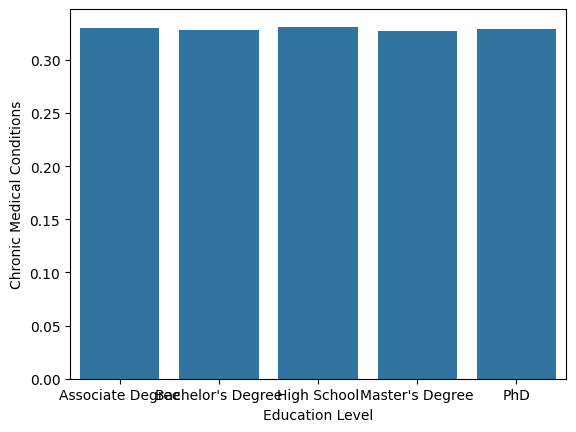

In [82]:
sns.barplot(data=data.groupby("Education Level")["Chronic Medical Conditions"].mean().reset_index(), y="Chronic Medical Conditions", x="Education Level")

In [84]:
data.drop("Name", inplace=True, axis=1)

In [85]:
categorical_columns = [col for col in data.drop("Chronic Medical Conditions", axis=1, inplace=False).columns if data[col].dtype == "object"]

In [86]:
categorical_columns

['Marital Status',
 'Education Level',
 'Smoking Status',
 'Physical Activity Level',
 'Employment Status',
 'Alcohol Consumption',
 'Dietary Habits',
 'Sleep Patterns']

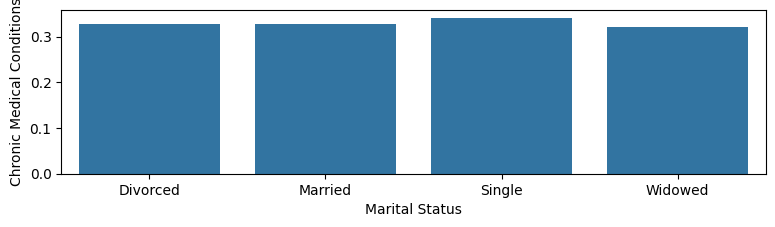

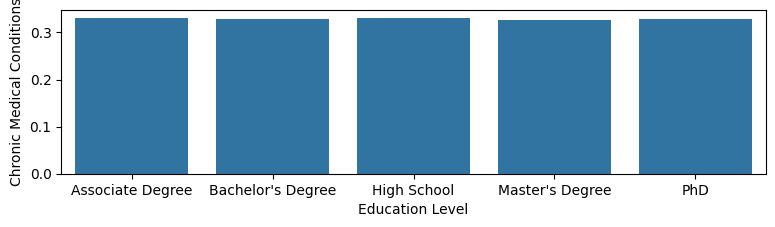

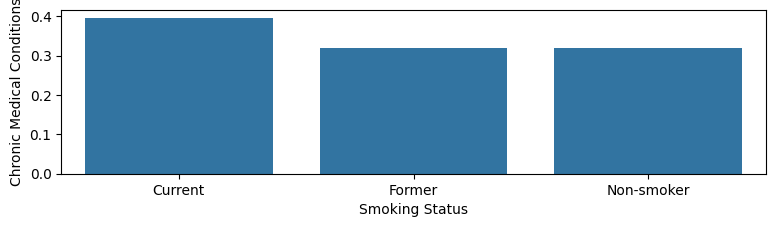

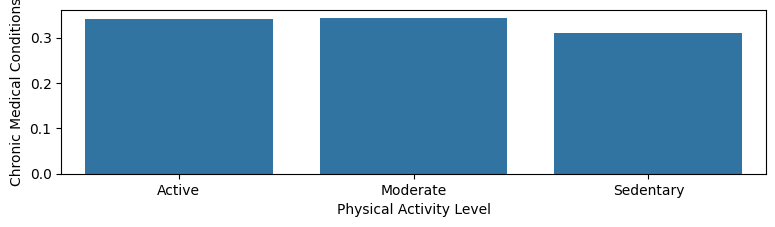

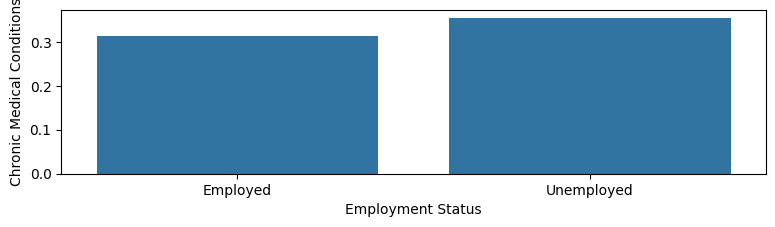

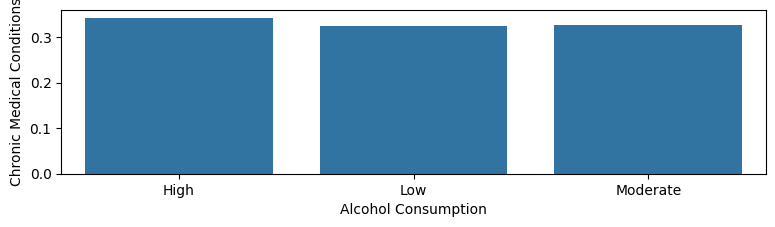

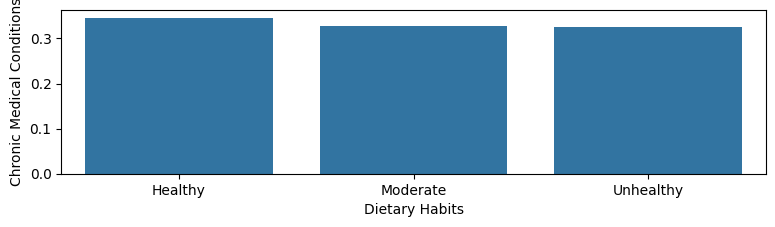

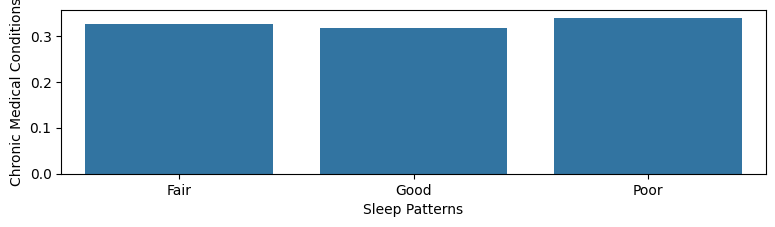

In [87]:
for index in range(len(categorical_columns)):
    plt.figure(figsize=(20, 20))
    plt.subplot(len(categorical_columns), 2, index+1)
    sns.barplot(data=data.groupby(categorical_columns[index])["Chronic Medical Conditions"].mean().reset_index(), 
                x = categorical_columns[index],
                y="Chronic Medical Conditions"
               )

In [88]:
data.head()

,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,False,False,True,True
1,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,False,False,False,True
2,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,False,False,True,False
3,58,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,False,False,False,False
4,18,Single,High School,0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,False,False,True,True


<Figure size 2000x2000 with 0 Axes>

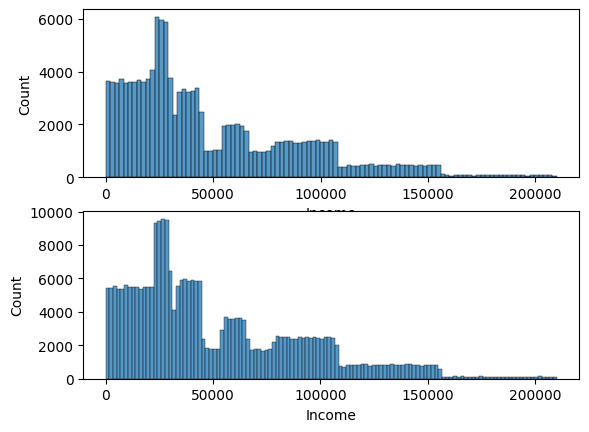

<Figure size 2000x2000 with 0 Axes>

In [89]:
plt.subplot(2, 1, 1)
sns.histplot(data[data["Chronic Medical Conditions"]]["Income"])
plt.subplot(2, 1, 2)
sns.histplot(data[~data["Chronic Medical Conditions"]]["Income"])
plt.figure(figsize=(20, 20))

Text(0.5, 1.0, 'Not-Depressed')

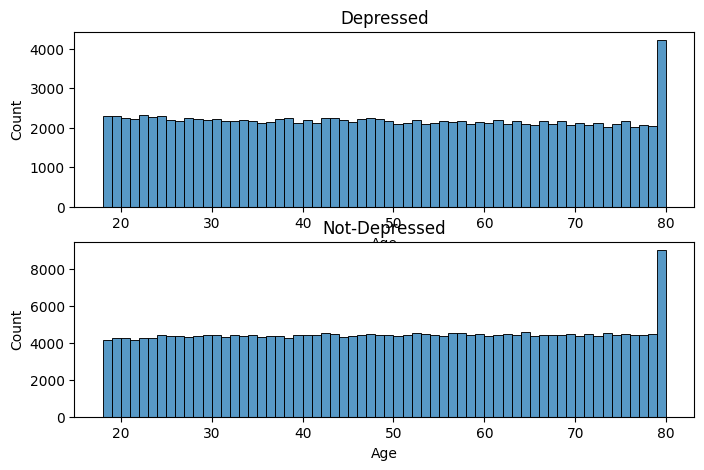

In [90]:
plt.figure(figsize=(8, 5))
plt.subplot(2, 1, 1)
sns.histplot(data[data["Chronic Medical Conditions"]]["Age"], bins=62)
plt.title("Depressed")

plt.subplot(2, 1, 2)
sns.histplot(data[~data["Chronic Medical Conditions"]]["Age"], bins=62)

plt.title("Not-Depressed")

In [92]:
import numpy as np

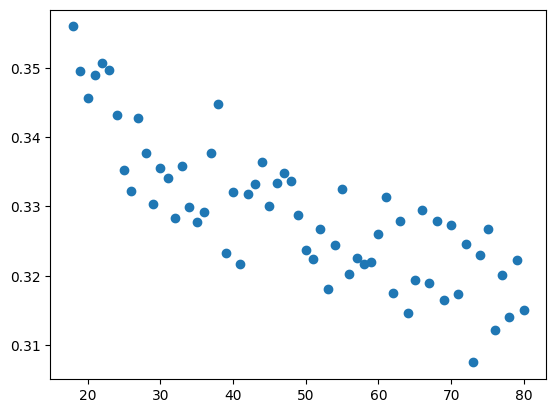

In [93]:
plt.scatter(data=data.groupby("Age")["Chronic Medical Conditions"].mean().reset_index(), x="Age", y="Chronic Medical Conditions")

In [102]:
bin_width = 1_000
data["Income_binned"] = np.floor(data["Income"] / bin_width) * bin_width

<Axes: xlabel='Income_binned', ylabel='Chronic Medical Conditions'>

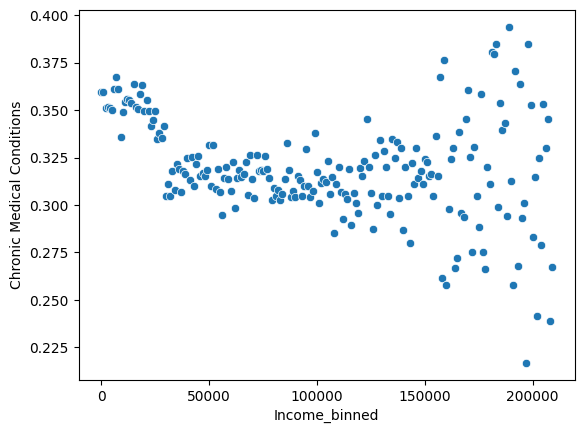

In [103]:
sns.scatterplot(data=data.groupby("Income_binned")["Chronic Medical Conditions"].mean().reset_index(), x="Income_binned", y="Chronic Medical Conditions")